# Number Place Solver Demo

In [1]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

from solver.core import CutOuter, Detector, Solver

## Show the problem image

In [2]:
cutouter = CutOuter(image_path="assets/data/problem/example2.png", size=28)
cutouter.cutout()

Text(0.5, 1.0, 'Reshaped')

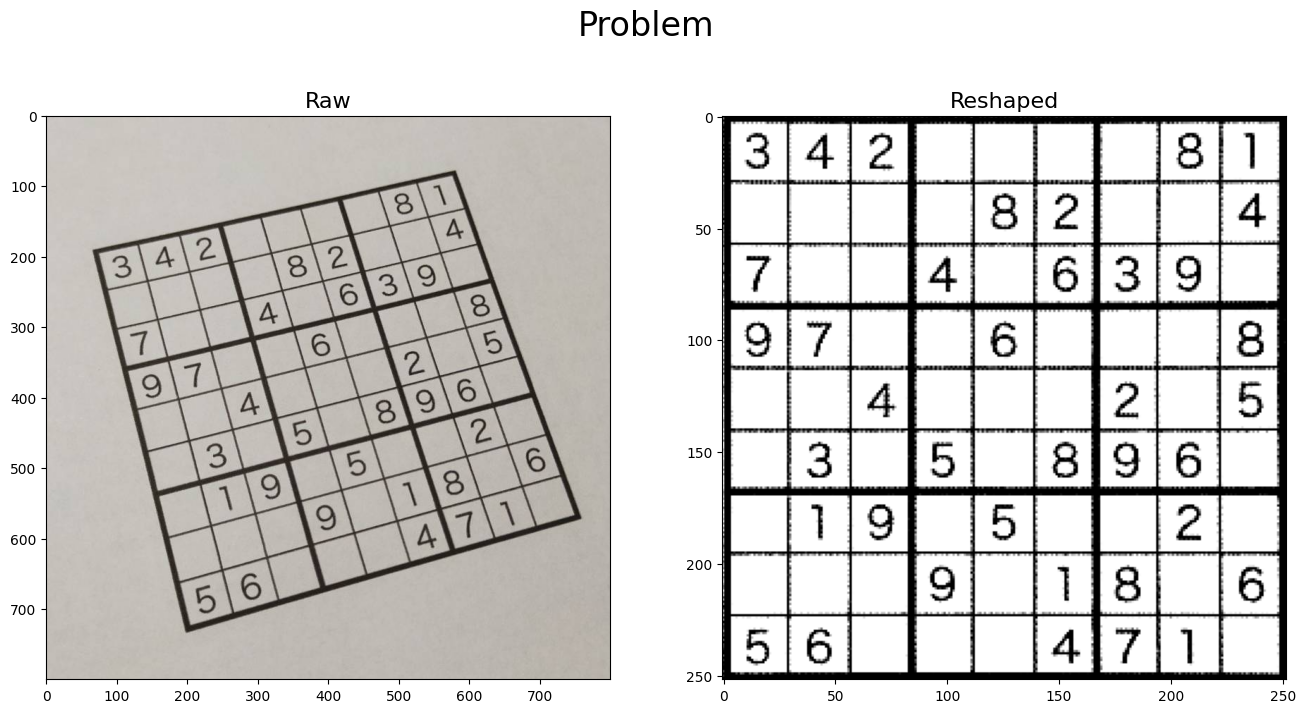

In [3]:
reshaped = cv2.cvtColor(cutouter.img, cv2.COLOR_BGR2RGB)
raw = cv2.cvtColor(cutouter.reshaper.color, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
fig.suptitle("Problem", fontsize=24, color="black")

ax[0].imshow(raw, cmap="Greys")
ax[0].set_title("Raw", fontsize=16, color='black')

ax[1].imshow(reshaped, cmap="Greys")
ax[1].set_title("Reshaped", fontsize=16, color="black")

### Show cutouted problem image

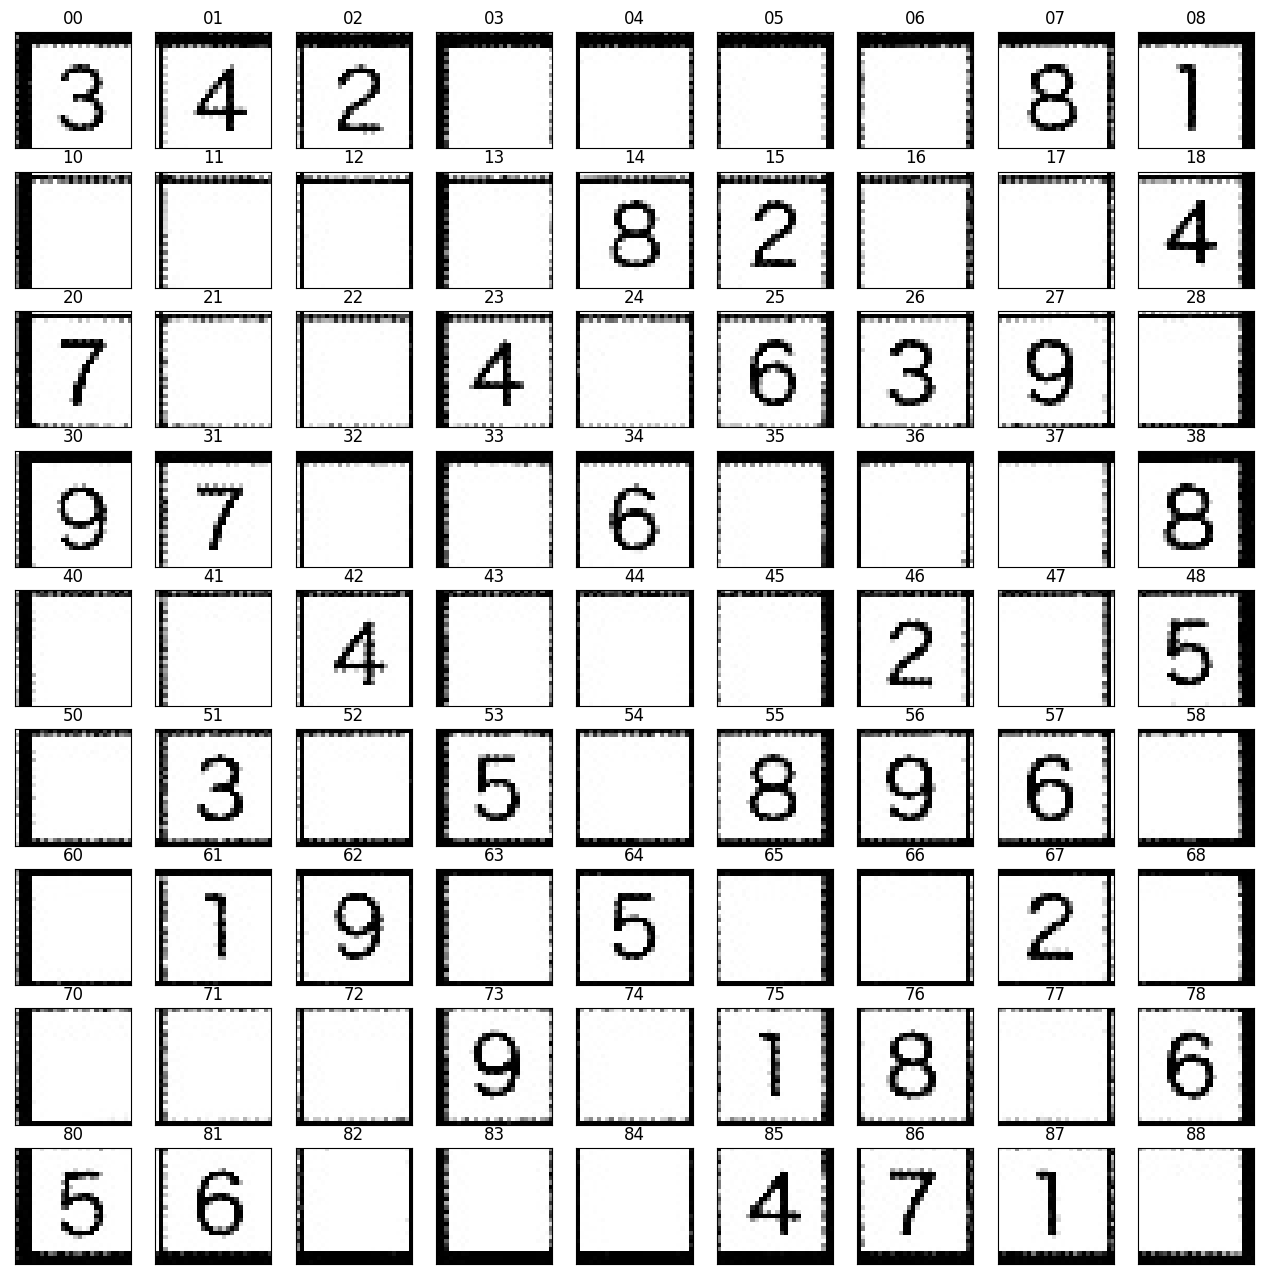

In [4]:
cols = rows = 9
fig = plt.figure(figsize=(16, 16))

for i, p in enumerate(sorted(cutouter.temp.glob('**/*.jpg'))):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(p.stem)
    img = Image.open(p)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

### Estimation from each cutouted images

In [5]:
detector = Detector(ckpt="assets/ckpt/last_ckpt.pth")
data = detector.detect(image_path="assets/data/problem/example2")

for num in data:
    print(*num)

3 4 2 0 0 0 0 0 1
0 0 0 0 8 2 0 0 4
7 0 0 4 0 6 3 9 0
9 7 0 0 6 0 0 0 8
0 0 4 0 0 0 2 0 5
0 3 0 5 0 0 9 6 0
0 1 9 0 5 0 0 2 0
0 0 0 9 0 1 8 0 6
5 6 0 0 0 4 7 1 0


### Solve the problem from the obtained data

In [6]:
solver = Solver()
result = solver.get_result(data)

for num in result:
    print(*num)

3 4 2 7 9 5 6 8 1
1 9 6 3 8 2 5 7 4
7 5 8 4 1 6 3 9 2
9 7 5 2 6 3 1 4 8
6 8 4 1 7 9 2 3 5
2 3 1 5 4 8 9 6 7
8 1 9 6 5 7 4 2 3
4 2 7 9 3 1 8 5 6
5 6 3 8 2 4 7 1 9


In [7]:
img = cutouter.img
height, width = img.shape[:2]

for i, col in enumerate(data):
    for j, item in enumerate(col):
        if int(item) == 0:
            cv2.putText(
                img,
                text=str(result[i][j]),
                org=(width // 9 * j + 9, height // 9 * (i + 1) - 9),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.5,
                color=(0, 0, 0),
                thickness=2,
                lineType=cv2.LINE_4
            )

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

AttributeError: 'CutOuter' object has no attribute 'color'

### Visualize the result

Text(0.5, 1.0, 'output')

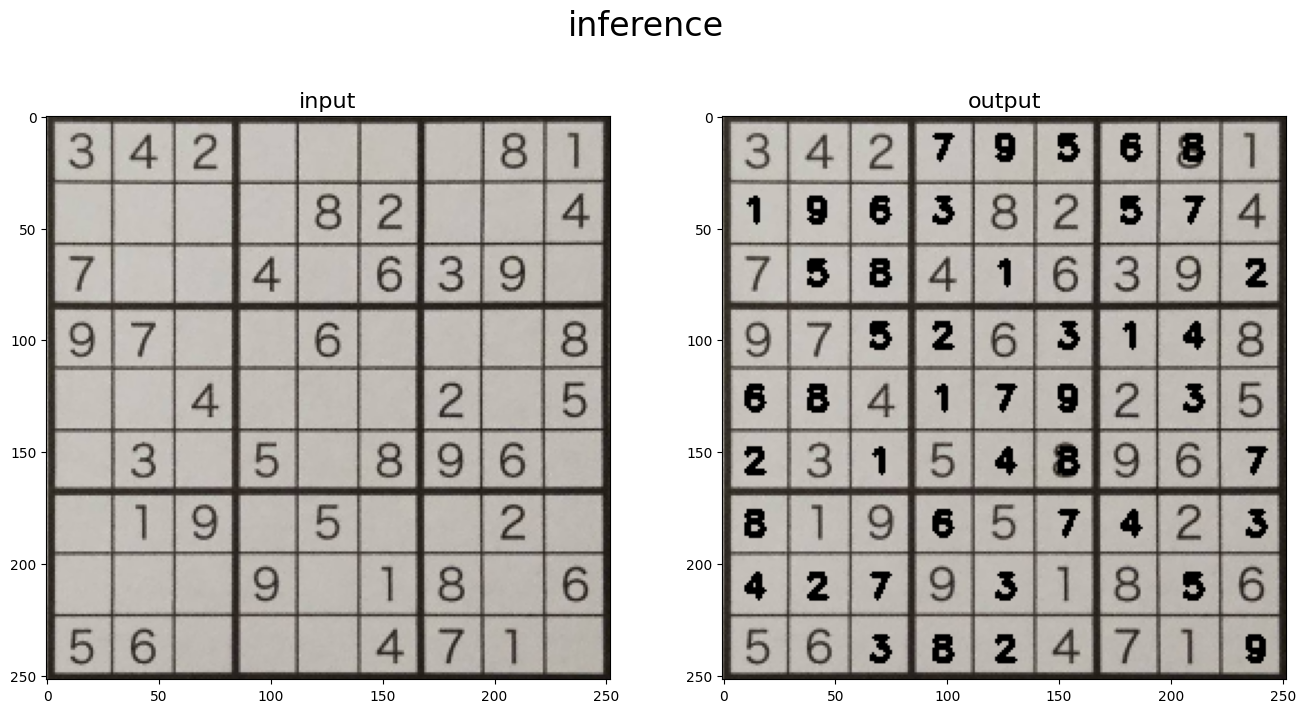

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
fig.suptitle("inference", fontsize=24, color="black")

ax[0].imshow(reshaped, cmap="Greys")
ax[0].set_title("input", fontsize=16, color="black")

ax[1].imshow(img, cmap="Greys")
ax[1].set_title("output", fontsize=16, color="black")